# Unrestricted 1D Random Walk 01

```
Author(s): Dustin Michels
March 29, 2018
```

In [2]:
import math         # pure python library
import numpy as np  # pip-installable library

## Section 01. Statistical Functions

In [3]:
my_list = [1, 2, 5, 10]

In [7]:
# Pure Python

def ave(my_list):
    return sum(my_list) / len(my_list)

def ave_sqr(my_list):
    return sum((x**2 for x in my_list)) / len(my_list)

def var(my_list):
    return ave_sqr(my_list) - ave(my_list)**2

def unc(my_list):
    return math.sqrt(var(my_list)) / (len(my_list)**0.5)

ave(my_list), var(my_list), unc(my_list)

(4.5, 12.25, 1.75)

In [5]:
# Using numpy, operating on python list

def np_unc(my_list):
    return np.sqrt(np.var(my_list)) / np.sqrt(len(my_list))

np.mean(my_list), np.var(my_list), np_unc(my_list)

(4.5, 12.25, 1.75)

In [5]:
# Using numpy, operating on numpy array

arr = np.array(my_list)

arr.mean(), arr.var(), np_unc(arr)

(4.5, 12.25, 1.75)

## Section 02. Sample Paths

### Random Steps of Length ± 1

In [6]:
import random

In [7]:
random.randint(0, 1)

0

In [8]:
n = 10

In [9]:
# pure python
[2 * random.randint(0,1) - 1 for x in range(n)]

[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]

In [10]:
# using numpy
2 * np.random.randint(low=0, high=2, size=n) - 1

array([-1, -1,  1, -1, -1,  1, -1, -1,  1,  1])

> Note:
- For `random.randint()` the upper bound is inclusive.
- For `numpy.random.randint()` the upper bound is exlcusive.

In [11]:
def steps(n):
    return 2 * np.random.randint(0, 2, n) - 1

In [12]:
steps(10)

array([-1,  1,  1,  1,  1, -1, -1, -1,  1,  1])

In [13]:
n = 100_000
np.sum(steps(n)) / n

0.00094

### Path as a List

#### Reduce

`reduce` in python is equivalent to a "fold left." It applies a function to each term in a list (or other "iterable"), from left to right, and returns the final result.

We can either define a 2-paremeter add function ahead of time, or do this inline with a "lambda" expression

In [14]:
from functools import reduce

def add_2(x, y):
    return x + y

In [15]:
reduce(add_2, steps(10))

-4

In [16]:
reduce(lambda x, y: x+y, steps(10))

6

#### Accumulate

The `FoldList` function in Mathematica doesn't just give the final result of applying reduce/fold -- it constructs a list with all intermediate results. In python, this can be achieved using `itertools.accumulate.`

> Note: `itertools.accumulate` returns a "generator" which we then convert (or "cast") into a list.

In [17]:
import itertools

In [18]:
steps(10)

array([ 1,  1,  1, -1, -1, -1,  1, -1, -1, -1])

In [19]:
list(itertools.accumulate(steps(10)))

[1, 2, 1, 2, 1, 0, 1, 0, 1, 2]

In [8]:
def x_values(n):
    return list(itertools.accumulate(steps(n)))

In [9]:
x_values(10)

NameError: name 'itertools' is not defined

## Section 03. Plots of Sample Paths

### Plotting One Trial

#### Frist, calculate positions and enumerate each step (t)

In [22]:
pos = [0] + x_values(10)  # add 0 to start of list
pos

[0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2]

In [23]:
t = np.arange(0, 10+1)  # enumerate steps from 0 to n
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#### Create plot using matplotlib

In [24]:
import matplotlib.pyplot as plt

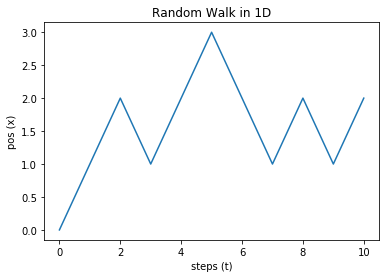

In [25]:
plt.plot(t, pos)
plt.ylabel('pos (x)')
plt.xlabel('steps (t)')
plt.title('Random Walk in 1D')

#### Make into a function

In [26]:
def plot_walk(n):
    pos = [0] + x_values(n)  # add 0 to start of list
    t = np.arange(0, n+1)    # enumerate steps from 0 to n
    plt.plot(t, pos)
    plt.ylabel('pos (x)')
    plt.xlabel('steps (t)')
    return plt

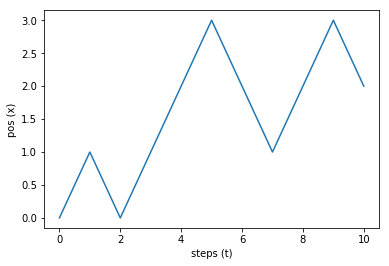

In [27]:
f = plot_walk(10)

<module 'matplotlib.pyplot' from '/Users/dustymichels/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

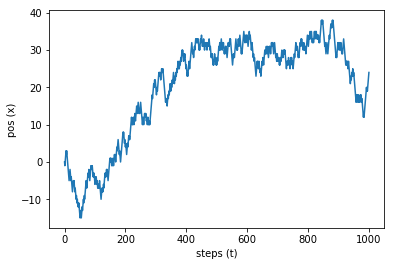

In [28]:
plot_walk(1000)

### Grid of Subplots

In [29]:
n = 1000
trails = 11

In [30]:
rows = 2
columns = math.ceil(trails/2)

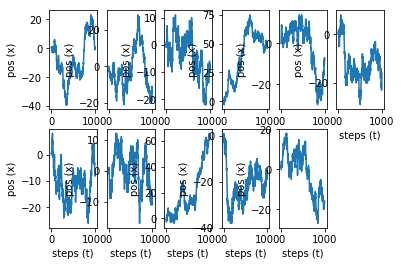

In [31]:
# One way (using plot_walk function)

for i in range(1, trails+1):
    plt.subplot(rows, columns, i)
    plot_walk(n)

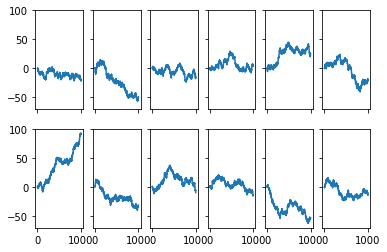

In [32]:
# Another way (slightly better?) way

fig, axs = plt.subplots(rows, columns, sharex=True, sharey=True)

for row in axs:
    for cell in row:
        
        pos = [0] + x_values(n)  # add 0 to start of list
        t = np.arange(0, n+1)    # enumerate steps from 0 to n
        cell.plot(t, pos)

### Interactive

In [33]:
import ipywidgets as widgets

<module 'matplotlib.pyplot' from '/Users/dustymichels/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

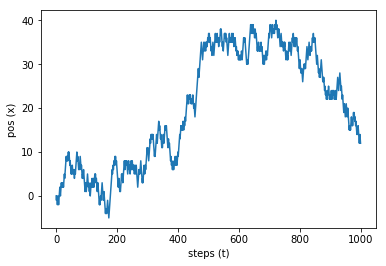

In [34]:
plot_walk(1000)

In [36]:
widgets.interact_manual(plot_walk, n=1000)

interactive(children=(IntSlider(value=1000, description='n', max=3000, min=-1000), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_walk>